# 0. Initialized project

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv
/kaggle/input/homecredit-feature-group/pcb_info_conso.parquet
/kaggle/input/homecredit-feature-group/main_df.parquet
/kaggle/input/homecredit-feature-group/HomeCredit_feature_group.xlsx


In [2]:
!pip install optbinning
!pip install statsmodels
!pip install mlxtend

  Obtaining dependency information for optbinning from https://files.pythonhosted.org/packages/c5/b8/6f048e3b54dd7609f099ea9de069135dc2f36340b64e961ca35521e9ac7d/optbinning-0.19.0-py3-none-any.whl.metadata
  Obtaining dependency information for ropwr>=1.0.0 from https://files.pythonhosted.org/packages/81/3f/f5461dc19a900bf12427c3235e3bf563329708f35a9add73b170be64b128/ropwr-1.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for cvxpy>=1.1.14 from https://files.pythonhosted.org/packages/f4/2b/3000122392d6f33e0148ac3a438d3a51ff089cd603e74347f98e313b2b06/cvxpy-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for osqp>=0.6.2 from https://files.pythonhosted.org/packages/9d/5f/8ecabe4ec72b29e0698d86493d3981047389c87f3a000da48c9305efa033/osqp-0.6.7.post1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for clarabel>=0.5.0 from 

In [3]:
import sklearn
# import statsmodels
# import optbinning
# import mlxtend

from tqdm import tqdm

import lightgbm
# import xgboost

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_colwidth', None)

In [4]:
"""
/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv
"""

'\n/kaggle/input/home-credit-default-risk/sample_submission.csv\n/kaggle/input/home-credit-default-risk/bureau_balance.csv\n/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv\n/kaggle/input/home-credit-default-risk/application_train.csv\n/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv\n/kaggle/input/home-credit-default-risk/application_test.csv\n/kaggle/input/home-credit-default-risk/previous_application.csv\n/kaggle/input/home-credit-default-risk/credit_card_balance.csv\n/kaggle/input/home-credit-default-risk/installments_payments.csv\n/kaggle/input/home-credit-default-risk/bureau.csv\n'

In [5]:
os.chdir('/kaggle/input')
feature_group = pd.read_excel('homecredit-feature-group/HomeCredit_feature_group.xlsx')

In [6]:
os.chdir('/kaggle/input/home-credit-default-risk')
#sample
sample_submission = pd.read_csv('sample_submission.csv', encoding='utf-8')
#bureau info
bureau = pd.read_csv('bureau.csv', encoding='utf-8')
bureau_balance = pd.read_csv('bureau_balance.csv', encoding='utf-8')
#main info
application_train = pd.read_csv('application_train.csv', encoding='utf-8')
application_test = pd.read_csv('application_test.csv', encoding='utf-8')
#past info
previous_application = pd.read_csv('previous_application.csv', encoding='utf-8')
#balance
pos_cash_balance = pd.read_csv('POS_CASH_balance.csv', encoding='utf-8')
#card info
credit_card_balance = pd.read_csv('credit_card_balance.csv', encoding='utf-8')
#payment info
installments_payments = pd.read_csv('installments_payments.csv', encoding='utf-8')

In [7]:
id_col = list(feature_group[feature_group['GROUP'].isin(['ID', 'LABEL'])]['Row'].unique())
feature_col = list(feature_group[~feature_group['GROUP'].isin(['ID', 'LABEL'])]['Row'].unique())

# 1. Exploratory data analysis

In [7]:
feature_group['GROUP'].value_counts()

GROUP
Credit info       65
Housing           55
Demo              31
Credit balance    18
POS               15
ID                13
Overdue            7
Enquiries          6
Credit score       3
Credit Info        2
Payment            2
LABEL              1
Income             1
Name: count, dtype: int64

In [8]:
id_col = list(feature_group[feature_group['GROUP'].isin(['ID', 'LABEL'])]['Row'].unique())
feature_col = list(feature_group[~feature_group['GROUP'].isin(['ID', 'LABEL'])]['Row'].unique())

In [ ]:
application_train.head(10)

In [ ]:
application_train.NAME_CONTRACT_TYPE.value_counts().index

In [ ]:
application_train[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'], as_index=False).mean()

In [ ]:
application_train[['NAME_FAMILY_STATUS']].value_counts()

In [ ]:
application_train[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS']).mean()

In [ ]:
application_train[['NAME_FAMILY_STATUS','FONDKAPREMONT_MODE','TARGET']].value_counts()

In [ ]:
application_train[['NAME_FAMILY_STATUS', 'FONDKAPREMONT_MODE','TARGET']]

In [ ]:
application_train.pivot_table(values='TARGET',
                  columns=['NAME_FAMILY_STATUS'],
                  aggfunc=['count'],
                  dropna=False,
         index=['FONDKAPREMONT_MODE'])

In [ ]:
application_train.pivot_table(values='TARGET',
                  aggfunc=['sum', 'count', 'mean'],
                  dropna=False,
         index=['NAME_FAMILY_STATUS'])

In [9]:
def plot_stats(feature:str, label:str, df, horizontal_layout, label_rotation):
    #prepare data
    temp_count = df[feature].value_counts()
    df_count = pd.DataFrame({feature:temp_count.index, 'No contracts':temp_count.values})
    df_perc = df[[feature, label]].groupby([feature], as_index=False).mean()
    df_perc.sort_values(by=label, ascending=False, inplace=True)
    
    #initialize subplot
    #horizontal layout
    if horizontal_layout:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,14))
    sns.set_color_codes('pastel')
    s1 = sns.barplot(ax=ax1, x=feature, y='No contracts', order=df_perc[feature], data=df_count)
    s2 = sns.barplot(ax=ax2, x=feature, y=label, order=df_perc[feature], data=df_perc)
    
    #tickmark flip
    if label_rotation:
        s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
        s2.set_xticklabels(s2.get_xticklabels(), rotation=90)
    
    #set up chart
    plt.ylabel('Percent of target with 1', fontsize=10)
#     plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show()

In [10]:
def plot_distribution(df, feature, bins=100):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s"%feature)
    sns.histplot(df[feature].dropna(), color='green', kde=True, bins=bins)
    plt.show()

In [11]:
def plot_distribution_target(df, feature_list, label, nrows=3):
    #data
    t1 = df.loc[df[label] != 0]
    t0 = df.loc[df[label] == 0]
    #get frame
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12, 6*nrows))
    
    i=0
    for feature in feature_list:
        i += 1
        plt.subplot(nrows,2,i)
        sns.kdeplot(t1[feature], bw_method=0.01, label='TARGET [1]')
        sns.kdeplot(t0[feature], bw_method=0.01, label='TARGET [0]')
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=10)
    plt.legend()
    plt.show()

In [ ]:
plot_stats('FONDKAPREMONT_MODE','TARGET', application_train, True, True)

In [ ]:
plot_stats('OCCUPATION_TYPE','TARGET', application_train, True, True)

In [ ]:
for i in range(2,22):
    plot_stats(f'FLAG_DOCUMENT_{i}','TARGET', application_train, True, True)

In [ ]:
application_train.info(verbose=True)

In [ ]:
plot_distribution(application_train, 'AMT_CREDIT', bins=30)

In [ ]:
feature_list = ['AMT_REQ_CREDIT_BUREAU_YEAR','CNT_CHILDREN',
                'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
                'AMT_INCOME_TOTAL','AMT_REQ_CREDIT_BUREAU_YEAR',
                'LIVINGAPARTMENTS_AVG'
               ]
plot_distribution_target(application_train, feature_list, 'TARGET', nrows=4)

In [ ]:
id_list = feature_group[feature_group['GROUP'].isin(['ID','LABEL'])]['Row']
feature_list = list(set(feature_group['Row']) - set(id_list))

In [ ]:
len(feature_list)

In [ ]:
plot_distribution(bureau, 'AMT_ANNUITY', bins=30)

In [ ]:
plot_distribution(bureau, 'AMT_CREDIT_SUM_LIMIT', bins=30)

In [ ]:
bureau_balance.head()

In [ ]:
bureau_balance['STATUS'].value_counts()

In [ ]:
pos_cash_balance.head()

In [ ]:
application_train.info(verbose=True, show_counts=True)

In [ ]:
application_train['FLAG_DOCUMENT_10'].isna().sum()

In [ ]:
filter1_comp['app']

# 2 Feature engineering

In [ ]:
# os.chdir('/kaggle/working')

In [8]:
def distinct_count(df):
    most_count_lst = {'col':[],'most_count':[], 'null_count':[]}
    total_count = len(df)
    for col in df.columns:
        most_count = df[col].value_counts(sort=True, dropna=False).iloc[0]
        null_count = df[col].isna().sum()
        
        cover_pct = most_count/total_count
        null_pct = null_count/total_count
        
        most_count_lst['col'].append(col)
        most_count_lst['most_count'].append(cover_pct)
        most_count_lst['null_count'].append(null_pct)
    
    return pd.DataFrame(most_count_lst)

df_list = [application_train, previous_application, pos_cash_balance, credit_card_balance, installments_payments, bureau, bureau_balance]
feat_store = ['app', 'prev', 'pos', 'cc', 'inst', 'bu', 'bu_bal']

filter1_comp = {}

for df, st in zip(df_list, feat_store):
    filter1 = distinct_count(df)
    drop_most_count = list(set(filter1[filter1['most_count']>=0.8]['col'])-set(id_col))
    drop_most_null = list(set(filter1[filter1['null_count']>=0.6]['col'])-set(id_col))
    filter1_comp[st] = drop_most_count + drop_most_null
    print(st)

app
prev
pos
cc
inst
bu
bu_bal


In [9]:
# id_col = list(feature_group[feature_group['GROUP'].isin(['ID', 'LABEL'])]['Row'].unique())
# feature_col = list(feature_group[~feature_group['GROUP'].isin(['ID', 'LABEL'])]['Row'].unique())

In [10]:
filter1_comp['bu']

['CREDIT_CURRENCY',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM_OVERDUE',
 'CREDIT_DAY_OVERDUE',
 'AMT_CREDIT_MAX_OVERDUE',
 'AMT_ANNUITY']

In [11]:
id_col

['SK_ID_CURR', 'TARGET', 'SK_BUREAU_ID', 'SK_ID_PREV ', 'NAME_CONTRACT_TYPE']

In [12]:
### PROCESS ###
def application_feature(df):
    df['AGE'] = round(df['DAYS_BIRTH']*-1/365,0)
    df['YEAR_WORKING'] = round(df['DAYS_EMPLOYED']*-1/365,0)
    df['inc_ovr_credit'] = df['AMT_INCOME_TOTAL']/df['AMT_CREDIT']
    df['inc_ovr_annuity'] = df['AMT_INCOME_TOTAL']/df['AMT_ANNUITY']
    df['inc_ovr_good'] = df['AMT_INCOME_TOTAL']/df['AMT_GOODS_PRICE']
    return df

In [13]:
application_train = (
    application_train.pipe(application_feature)
    )

<Axes: >

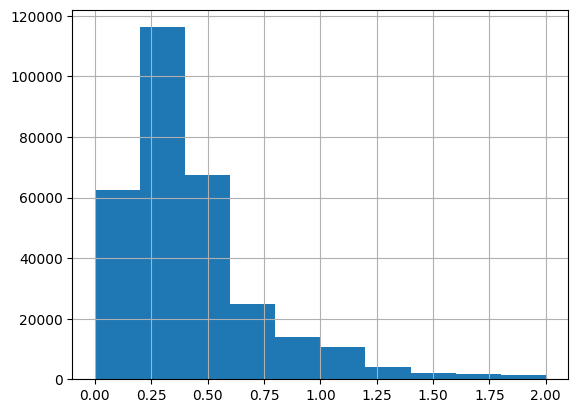

In [14]:
application_train['inc_ovr_good'].hist(range=(0,2))

In [15]:
from functools import reduce

def time_travel(df, mth):
    """
    DAYS_CREDIT --> LxM
    """
    filter_time = (df['LxM']*-1) <= mth
    return df[filter_time]
   
# customer function
def q20(x):
    return x.quantile(0.2)

def q80(x):
    return x.quantile(0.8)

def average(x, mth_counts):
    """
    x = pd.Series
    """
    return x.sum()/mth_counts

    
def agg_cal(input_df:pd.DataFrame, 
            group_col:list, 
            val:str,
            agg_fn:list,
           ):    
    
    group_df = input_df[[val]+group_col].groupby(group_col, dropna=False)
    
    df = group_df.agg({val:agg_fn})
    df.columns = agg_fn
    all_func = agg_fn
    function_name = [fn.__name__ if callable(fn) else fn for fn in agg_fn]
    rename_cols = [val+'_'+F for F in (function_name)]
    df.columns = rename_cols
    
    return df


def generate_feature_lxm(df, 
                         group_col:list, 
                         val_col:list, 
                         agg_fn:list,  
                         LxM:list):
    """
        required columns: ['LxM']
    """
    result_lst = []
    for val in tqdm(val_col):
        for mth_counts in LxM: 
            df_lxm = time_travel(df, mth_counts)
            result = agg_cal(df_lxm, group_col, val, agg_fn)
            result.columns = [col+f'_l{mth_counts}m' for col in result.columns]
            result_lst.append(result)
        
    final_df = reduce(lambda  left,right: pd.merge(left, right, on=group_col, how='outer'), result_lst)
    return final_df

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
df_pcb = bureau[bureau['SK_ID_CURR'].isin(application_train['SK_ID_CURR'].unique())]
df_pcb['LxM'] = df_pcb['DAYS_CREDIT']/30.5
df_pcb['loan_term'] = df_pcb['AMT_CREDIT_SUM']/df_pcb['AMT_ANNUITY']

In [ ]:
len(application_train)

In [ ]:
len(df_pcb)

In [ ]:
df_pcb['CREDIT_ACTIVE'].value_counts()

In [ ]:
def pcb_ts_info(df_pcb):
    active = df_pcb['CREDIT_ACTIVE']=='Active'
    close = df_pcb['CREDIT_ACTIVE']=='Closed'
    df_active = df_pcb[active]
    df_close = df_pcb[close]

    group_col = ['SK_ID_CURR']
    val_col = ['AMT_CREDIT_SUM','AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_DEBT', 'loan_term']
    agg_fn = ['mean','min','max','sum','count', 'std', 'var']
    LxM = [3,6,9,12,15,24,36]

    pcb_ts_all = generate_feature_lxm(df_pcb, group_col, val_col, agg_fn, LxM)
    pcb_ts_active = generate_feature_lxm(df_active, group_col, val_col, agg_fn, LxM)
    pcb_ts_closed = generate_feature_lxm(df_close, group_col, val_col, agg_fn, LxM)

    pcb_ts_active.columns = [col+'_active' for col in pcb_ts_active.columns]
    pcb_ts_closed.columns = [col+'_close' for col in pcb_ts_closed.columns]
    
    result_lst = [pcb_ts_all, pcb_ts_active, pcb_ts_closed]
    
    final_df = reduce(lambda  left,right: pd.merge(left, right, on=group_col, how='outer'), result_lst)
    return final_df

In [ ]:
pcb_ts_total = pcb_ts_info(df_pcb)

In [ ]:
prod_group = ['Consumer credit', 'Credit card', 'Car loan', 'Mortgage']
pcb_ts_prod = {}
for prod in prod_group:
    print(f'Processing {prod}')
    df_prod = df_pcb[df_pcb['CREDIT_TYPE'] == prod].copy()
    pcb_ts_prod[prod] = pcb_ts_info(df_prod)

In [ ]:
rename_prod = ['csm', 'card', 'car', 'mg']

for prod, name in zip(prod_group, rename_prod):
    df_to_rename = pcb_ts_prod[prod]
    df_to_rename.columns = [col+'_'+name for col in df_to_rename.columns] 
    print(prod)

In [ ]:
to_merge = [i.reset_index() for i in pcb_ts_prod.values()]
to_merge.append(pcb_ts_total)

del pcb_ts_prod
del pcb_ts_total

In [ ]:
pcb_info_conso = reduce(lambda  left,right: pd.merge(left, right, on='SK_ID_CURR', how='outer'), to_merge)

In [ ]:
filter1a = distinct_count(pcb_info_conso)
drop_most_count = list(set(filter1a[filter1a['most_count']>=0.8]['col'])-set(id_col))
drop_most_null = list(set(filter1a[filter1a['null_count']>=0.6]['col'])-set(id_col))

In [ ]:
keep = set(pcb_info_conso.columns) - set(drop_most_count + drop_most_null)

In [ ]:
pcb_info_conso_ = pcb_info_conso[list(keep)]
del pcb_info_conso

In [ ]:
application_train.to_parquet(r'main_df.parquet')
pcb_info_conso_.to_parquet(r'pcb_info_conso.parquet')

In [17]:
df_pcb = bureau[bureau['SK_ID_CURR'].isin(application_train['SK_ID_CURR'].unique())]
df_pcb['LxM'] = df_pcb['DAYS_CREDIT']/30.5
df_pcb['loan_term'] = df_pcb['AMT_CREDIT_SUM']/df_pcb['AMT_ANNUITY']

#Check point
application_train = pd.read_parquet(r'/kaggle/input/homecredit-feature-group/main_df.parquet')
pcb_info_conso_ = pd.read_parquet(r'/kaggle/input/homecredit-feature-group/pcb_info_conso.parquet')

In [18]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEAR_WORKING,inc_ovr_credit,inc_ovr_annuity,inc_ovr_good
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,2.0,0.498036,8.198215,0.576923
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,3.0,0.208736,7.563343,0.239044
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,None,NaN,None,None,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,1.0,0.500000,10.000000,0.500000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,None,NaN,None,None,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52.0,8.0,0.431748,4.547522,0.454545
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,None,NaN,None,None,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,8.0,0.236842,5.556699,0.236842


In [19]:
application_train.shape

(307511, 127)

In [20]:
condition = (df_pcb['CREDIT_DAY_OVERDUE'] <=10) & (df_pcb['CREDIT_DAY_OVERDUE'] >= 1)
df_pcb['is_1_10dpd'] = np.where(condition, 1, 0)

condition = (df_pcb['CREDIT_DAY_OVERDUE'] <=30) & (df_pcb['CREDIT_DAY_OVERDUE'] >= 10)
df_pcb['is_10_30dpd'] = np.where(condition, 1, 0)

condition = (df_pcb['CREDIT_DAY_OVERDUE'] > 30)
df_pcb['is_gt30dpd'] = np.where(condition, 1, 0)

In [21]:
def pcb_dpd(df_pcb):
    group_col = ['SK_ID_CURR']
    val_col = ['CREDIT_DAY_OVERDUE']
    agg_fn = ['max']
    LxM = [3,6,9,12,15,24,36, 48,60,72,84]

    pcb_dpd_ts = generate_feature_lxm(df_pcb, group_col, val_col, agg_fn, LxM)
    return pcb_dpd_ts

In [22]:
df_pcb_dpd = pcb_dpd(df_pcb)
df_pcb_dpd = df_pcb_dpd.fillna(0).reset_index()

100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


In [23]:
df_pcb['active_mths_remain'] = df_pcb[df_pcb['CREDIT_ACTIVE']=='Active']['DAYS_CREDIT_ENDDATE']/30.5
cond1 = (df_pcb['active_mths_remain']<0)
df_pcb['active_mths_remain'] = np.where(cond1, 0, df_pcb['active_mths_remain'])  
df_pcb['active_mths_remain'] = df_pcb['active_mths_remain'].fillna(0)

In [24]:
df_pcb['card_utl_rate'] = df_pcb['AMT_CREDIT_SUM_DEBT']/df_pcb['AMT_CREDIT_SUM_LIMIT']

df_pcb['card_utl_rate'] = np.where((df_pcb['CREDIT_TYPE']=='Credit card') & (df_pcb['card_utl_rate']!=np.inf),df_pcb['card_utl_rate'],np.nan)

In [25]:
df_ts = pd.merge(df_pcb[['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_TYPE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_LIMIT']], 
         bureau_balance, 
         how='inner', 
         on='SK_ID_BUREAU')

In [26]:
def replace_prod(row, prod_group):
    if row in (prod_group):
        return row
    else:
        return 'Others'

In [27]:
prod_group = ['Consumer credit', 'Credit card', 'Car loan', 'Mortgage']
df_ts['CREDIT_TYPE'] = df_ts['CREDIT_TYPE'].apply(lambda row: replace_prod(row, prod_group))
df_ts['STATUS'].fillna('X', inplace=True)

In [28]:
df_ts['CREDIT_TYPE'].value_counts()

CREDIT_TYPE
Consumer credit    11127735
Credit card         3069223
Car loan             276291
Mortgage             153327
Others                75036
Name: count, dtype: int64

In [29]:
df_ts['STATUS'].value_counts(dropna=False)

STATUS
C    7027575
0    4615684
X    2837039
1     155330
5      40528
2      15583
3       5976
4       3897
Name: count, dtype: int64

In [30]:
df_ts['is_active'] = np.where(df_ts['STATUS'].isin(['X', 'C']), 0, 1)
df_ts['ln_grp'] = np.where(df_ts['STATUS'].isin(['X', 'C']), 0, df_ts['STATUS'])
df_ts['ln_grp'] = df_ts['ln_grp'].astype(int)
df_ts['LxM'] = df_ts['MONTHS_BALANCE']

In [31]:
# check bureau_id trong LxM có tồn tại process_month active
# đếm distinct bureau_id theo loại HĐ - sum theo ID

In [32]:
df_ts.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_TYPE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_LIMIT,MONTHS_BALANCE,STATUS,is_active,ln_grp,LxM
0,380361,5715448,Credit card,67500.0,67500.0,0,C,0,0,0
1,380361,5715448,Credit card,67500.0,67500.0,-1,C,0,0,-1
2,380361,5715448,Credit card,67500.0,67500.0,-2,C,0,0,-2
3,380361,5715448,Credit card,67500.0,67500.0,-3,C,0,0,-3
4,380361,5715448,Credit card,67500.0,67500.0,-4,C,0,0,-4


In [54]:
df_ts['CREDIT_TYPE'].value_counts()

CREDIT_TYPE
Consumer credit    11127735
Credit card         3069223
Car loan             276291
Mortgage             153327
Others                75036
Name: count, dtype: int64

In [34]:
df_ts['is_active'].value_counts()

is_active
0    9864614
1    4836998
Name: count, dtype: int64

In [35]:
df_ts['ln_grp'].value_counts()

ln_grp
0    14480298
1      155330
5       40528
2       15583
3        5976
4        3897
Name: count, dtype: int64

In [37]:
group_col = ['SK_ID_CURR']
val_col = ['ln_grp']
agg_fn = ['max']
LxM = [3,6,9]
df_ln_grp = generate_feature_lxm(df_ts,
                    group_col=group_col,
                    val_col=val_col,
                    agg_fn=agg_fn,
                    LxM=LxM)

100%|██████████| 1/1 [00:01<00:00,  1.62s/it]


In [55]:
prod_group

['Consumer credit', 'Credit card', 'Car loan', 'Mortgage']

In [77]:
lxm_counts = 6
# ft_prod = df_ts['CREDIT_TYPE']==prod_group[0]
ft_status = df_ts['is_active']==1
ft_lxm = (df_ts['LxM']*-1) <= lxm_counts

ts_ft = df_ts[ft_status & ft_lxm]
prod_count_ts = ts_ft[['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_TYPE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_LIMIT']].groupby('SK_ID_BUREAU').max().reset_index()


In [78]:
pd.pivot_table(prod_count_ts, values='SK_ID_BUREAU', index=['SK_ID_CURR'], columns=['CREDIT_TYPE'], aggfunc="count").reset_index()

CREDIT_TYPE,SK_ID_CURR,Car loan,Consumer credit,Credit card,Mortgage,Others
0,100002,NaN,NaN,1.0,NaN,NaN
1,100019,NaN,1.0,1.0,NaN,NaN
2,100032,NaN,1.0,NaN,NaN,NaN
3,100033,NaN,NaN,1.0,NaN,NaN
4,100048,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...
67125,456242,NaN,NaN,1.0,NaN,NaN
67126,456244,NaN,NaN,2.0,NaN,NaN
67127,456247,NaN,3.0,1.0,NaN,NaN
67128,456253,NaN,1.0,NaN,NaN,NaN


In [81]:
pd.pivot_table(prod_count_ts, values=['AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_LIMIT'], index=['SK_ID_CURR'], columns=['CREDIT_TYPE'], aggfunc="sum").reset_index()

SK_ID_CURR AMT_CREDIT_SUM                                       \
CREDIT_TYPE                  Car loan Consumer credit Credit card Mortgage   
0               100002            NaN             NaN   31988.565      NaN   
1               100019            NaN        450000.0  270000.000      NaN   
2               100032            NaN        209250.0         NaN      NaN   
3               100033            NaN             NaN  675000.000      NaN   
4               100048            NaN             NaN         NaN      NaN   
...                ...            ...             ...         ...      ...   
67125           456242            NaN             NaN  198000.000      NaN   
67126           456244            NaN             NaN  553500.000      NaN   
67127           456247            NaN       1173024.0   94500.000      NaN   
67128           456253            NaN       2250000.0         NaN      NaN   
67129           456255            NaN        436032.0   90000.000      NaN   

                     AMT_CREDIT_SUM_LIMIT                              \
CREDIT_TYPE   Others             Car loan Consumer credit Credit card   
0                NaN                  NaN             NaN   31988.565   
1                NaN                  NaN             0.0  270000.000   
2                NaN                  NaN             0.0         NaN   
3                NaN                  NaN             NaN       0.000   
4            22905.0                  NaN             NaN         NaN   
...              ...                  ...             ...         ...   
67125            NaN                  NaN             NaN       0.000   
67126            NaN                  NaN             NaN       0.000   
67127            NaN                  NaN             0.0       0.000   
67128            NaN                  NaN             0.0         NaN   
67129            NaN                  NaN             0.0       0.000   

                             
CREDIT_TYPE Mortgage Others  
0                NaN    NaN  
1                NaN    NaN  
2                NaN    NaN  
3                NaN    NaN  
4                NaN    0.0  
...              ...    ...  
67125            NaN    NaN  
67126            NaN    NaN  
67127            NaN    NaN  
67128            NaN    NaN  
67129            NaN    NaN  

[67130 rows x 11 columns]

# 3. Feature selection

Univarite <br>
Multivariate

In [ ]:

"""
> Filter selection.
> Marginal IV.
> Stepwise regression for model selecton.
> Resursive feature selection.
> 
> For ML?
"""

# 4. Model training

In [ ]:
"""
Tunning
"""

# 5. Evaluation 
1. residual analysis <br>
2. linear assumption <br>
3. assessing fit <br>
4. interaction among covariates <br>

# 6 Calibration

# 7. Model interpretation